# PCML Project-1 ~ Team #60

## Initial Python Imports

In [27]:
# Useful starting lines
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import datetime

from costs import compute_loss

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [28]:
from proj1_helpers import *
from helpers import *

DATA_TRAIN_PATH = "../Data/train.csv" # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

#print the shape of the offset x matrix.
print('y shape: ',y.shape)
print('original tX shape: ',tX.shape)
print('ids shape: ',ids.shape)

y shape:  (250000,)
original tX shape:  (250000, 30)
ids shape:  (250000,)


## Data preprocessing

### Count Outliers

In [29]:
outliers = count_outliers(tX,-999)
for feature in range(tX.shape[1]):
    print('feature: ',feature,' -> ',outliers[feature])

feature:  0  ->  38114.0
feature:  1  ->  0.0
feature:  2  ->  0.0
feature:  3  ->  0.0
feature:  4  ->  177457.0
feature:  5  ->  177457.0
feature:  6  ->  177457.0
feature:  7  ->  0.0
feature:  8  ->  0.0
feature:  9  ->  0.0
feature:  10  ->  0.0
feature:  11  ->  0.0
feature:  12  ->  177457.0
feature:  13  ->  0.0
feature:  14  ->  0.0
feature:  15  ->  0.0
feature:  16  ->  0.0
feature:  17  ->  0.0
feature:  18  ->  0.0
feature:  19  ->  0.0
feature:  20  ->  0.0
feature:  21  ->  0.0
feature:  22  ->  0.0
feature:  23  ->  99913.0
feature:  24  ->  99913.0
feature:  25  ->  99913.0
feature:  26  ->  177457.0
feature:  27  ->  177457.0
feature:  28  ->  177457.0
feature:  29  ->  0.0


### Standardization

In [ ]:
#standardization
#tX, mean_x, std_x = standardize(tX, mean_x=None, std_x=None)
tX, mean_x, std_x = standardize_outliers(tX)
print('standardized tX shape: ',tX.shape)
print('tX mean shape: ',mean_x.shape)
print('tX std shape: ',std_x.shape)

### Analysis of output y

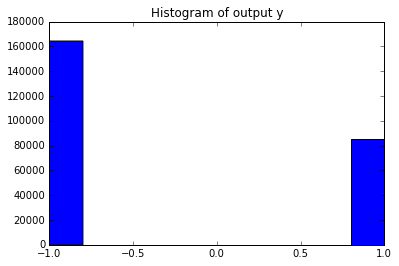

In [ ]:
# Histogram of output y
plt.hist(y, bins=10, align='mid')
plt.title("Histogram of output y")
plt.show()

### Analysis of y as a function of all its features (one by one)

feature:  0


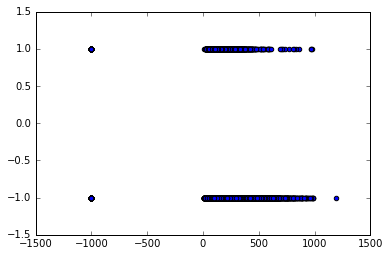

feature:  1


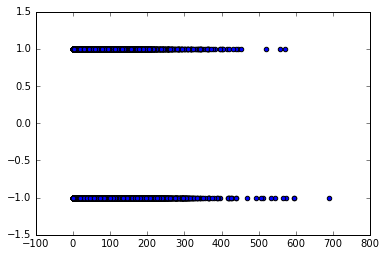

feature:  2


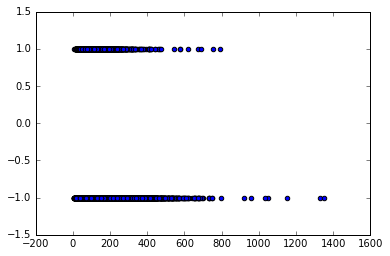

feature:  3


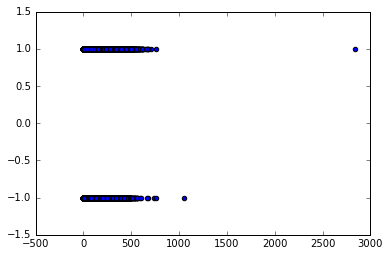

feature:  4


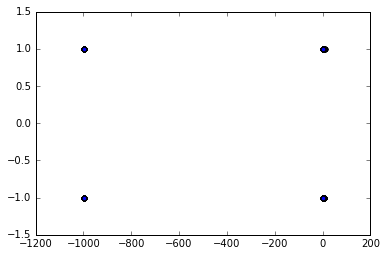

feature:  5


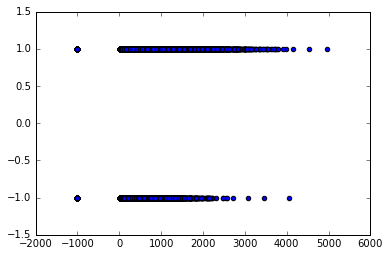

feature:  6


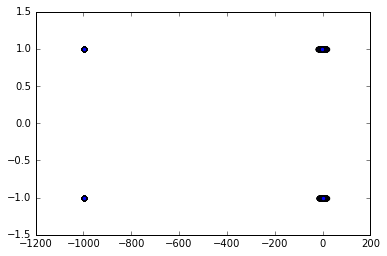

feature:  7


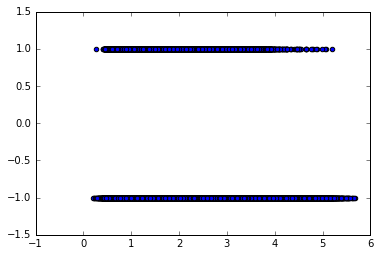

feature:  8


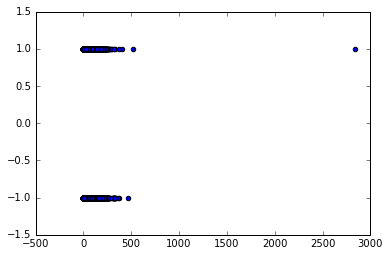

feature:  9


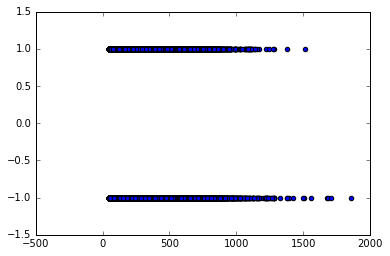

feature:  10


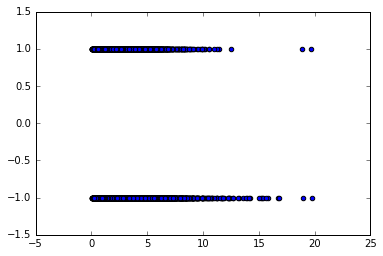

feature:  11


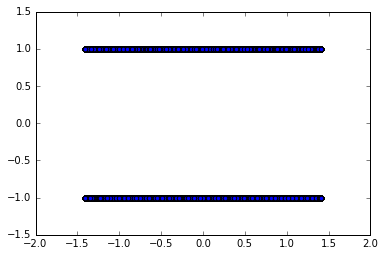

feature:  12


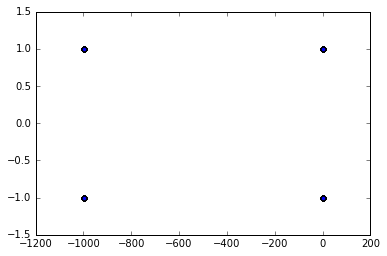

feature:  13


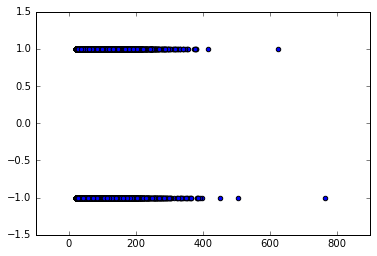

feature:  14


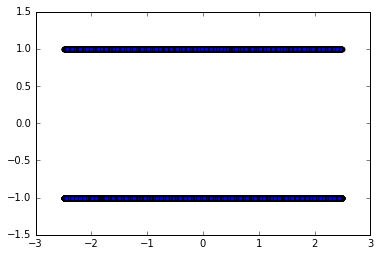

feature:  15


In [ ]:
# Analyse y as a function of all the other features (one by one)
plot_features_by_y(y,tX)

## Linear regression using gradient descent

In [ ]:
from gradient_descent import least_squares_GD

# Define the parameters of the algorithm.
max_iters = 1000
gamma = 0.01

# Initialization
w_initial = np.zeros(tX.shape[1])

# Start gradient descent.
# start_time = datetime.datetime.now()
gradient_losses, gradient_ws = least_squares_GD(y, tX, w_initial, gamma, max_iters)
# end_time = datetime.datetime.now()


## Linear regression using stochastic gradient descent

In [ ]:
from stochastic_gradient_descent import least_squares_SGD

# Define the parameters of the algorithm.
max_iters = 1000
gamma = 0.01
batch_size = 50

# Initialization
w_initial = np.zeros(tX.shape[1])

# Start SGD.
# start_time = datetime.datetime.now()
stoch_gradient_losses, stoch_gradient_ws = least_squares_SGD(y, tX, w_initial, batch_size, gamma, max_iters)
# end_time = datetime.datetime.now()

In [ ]:
def get_min_param_index(sgd_losses):
    index = 0
    min_loss = 100000
    min_index = len(sgd_losses) - 1
    for loss in stoch_gradient_losses:
        if loss < min_loss:
            min_loss = loss
            min_index = index
        index += 1
#         print(loss)

    return min_index, min_loss

min_i, min_loss = get_min_param_index(stoch_gradient_losses)
print('min index: ',min_i)
print('min loss: ',min_loss)

## Least squares regression using normal equations

In [ ]:
from least_squares import least_squares

# start_ls_time = datetime.datetime.now()
ls_wopt, ls_loss = least_squares(y,tX)
# end_ls_time = datetime.datetime.now()
print('loss=',ls_loss)
print('parameters w: ',ls_wopt)

## Ridge regression using normal equations

In [ ]:
from ridge_regression import ridge_regression

# lambdas = np.logspace(-3, 1, 10)      
# φ_x = build_poly(x, degree)
# x_train, x_test, y_train, y_test = split_data(tX, y, ratio, seed)
    
#     for lamb in lambdas:

w_ridge = ridge_regression(y, tX, 0.01)
err = compute_loss(y, tX, w_ridge)

print('loss: ',err)
print('parameters w: ',w_ridge)

# rmse_tr = np.sqrt(2*compute_loss(y, tX, w_ridge))
# rmse_te = np.sqrt(2*compute_loss(y, tX, w_ridge))


## Logistic regression using gradient descent or SGD

In [ ]:
from helpers import de_standardize
from logistic_regression import learning_by_gradient_descent, calculate_loss
from plots import visualization

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.000000001
    losses = []

    # build tx
    tx = x
    w = np.zeros((tx.shape[1], 1))
    
    print('tx: ',tx.shape)
    print('w: ',w.shape)
    print('y: ',y.shape)

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 1000 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))

# logistic_regression_gradient_descent_demo(y, tX)

## Regularized logistic regression using gradient descent or SGD

## Full testing

In [ ]:
from test import *

test_GD(y, tX, ratio=0.1)
test_SGD(y, tX, ratio=0.1)
test_LS(y, tX, ratio=0.1)
test_RR(y, tX, ratio=0.1)
test_LR(y, tX, ratio=0.1)
# test_RLR(y, tX, ratio=0.1)

## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = "../Data/test.csv" # TODO: download test data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)